<a href="https://colab.research.google.com/github/seth-mc/machine-learning/blob/main/DCGANGoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>DCGAN:</b> Handwritten Digits

####Learning the structural features basic handwritten digits. 

<p>original code from <a href="https://github.com/asiltureli/gan-in-colab" target="_blank">@asiltureli</a>. 


In [ ]:
!pip install array2gif

##Defining the Generator ("Forger") and the Discriminator ("Detective"):

<br>
GANs (Generative Adversarial Networks) are made up of two neural networks that aim to compete with one another. The "forger" neural network uses a random noise vector to create artificial images. Meanwhile, the "detective" is fed genuine images and utilises them to identify whether the forger's bogus images are real or fake. The generator improves its abilities to create images in response to feedback from the discriminator, while the discriminator improves its ability to distinguish between actual and fraudulent images. 

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
import torchvision
import numpy as np
import matplotlib.pyplot as plt

class Generator(nn.Module):
  def __init__(self, latent_size = 100):  # latent size = representation of compressed data. 100 is the standard hyperparameter.
    super(Generator, self).__init__()

    self.layers = nn.Sequential(nn.ConvTranspose2d(latent_size, 1024, 4,1,0,bias=False),  # creates sequential container for convulational layers
                                                                                          # convulational = "blended" together, filtered groups of funtions -- see https://youtu.be/f0t-OCG79-U 
                           nn.BatchNorm2d(1024),  #  standardizes the inputs to a layer for each mini-batch
                           nn.ReLU(True),  # outputs the input directly if it is positive, otherwise, it will output zero.
                           # 4x4
                           nn.ConvTranspose2d(1024, 512, 4, 2, 1, bias=False),
                           nn.BatchNorm2d(512),
                           nn.ReLU(True),
                           # 8x8
                           nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
                           nn.BatchNorm2d(256),
                           nn.ReLU(True),
                           # 16 x 16
                           nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
                           nn.BatchNorm2d(128),
                           nn.ReLU(True),
                           # 32 x 32
                           nn.ConvTranspose2d(128, 1, 4, 2, 1, bias=False),
                           nn.Tanh()
                           # 64 x 64
                           )
  def __call__(self, latent_space):
      return self.forward(latent_space)
    
  def forward(self, latent_space):
      return self.layers(latent_space.cuda())
       


class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()
    # 64x64
    self.layers = nn.Sequential(nn.Conv2d(1, 128, 4,2,1,bias=False),
                           nn.LeakyReLU(0.2, inplace=True),
                           # 32x32
                           nn.Conv2d(128, 256, 4, 2, 1, bias=False),
                           nn.BatchNorm2d(256),
                           nn.LeakyReLU(0.2, inplace=True),
                           # 16 x 16
                           nn.Conv2d(256, 512, 4, 2, 1, bias=False),
                           nn.BatchNorm2d(512),
                           nn.LeakyReLU(0.2, inplace=True),
                           # 8 x 8
                           nn.Conv2d(512, 1024, 4, 2, 1, bias=False),
                           nn.BatchNorm2d(1024),
                           nn.LeakyReLU(0.2, inplace=True),
                           # 4 x 4
                           nn.Conv2d(1024, 1, 4, 1, 0, bias=False),
                           nn.Sigmoid()
                           # 1 x 1
                          )
  def __call__(self, img):
      return self.forward(img)
    
  def forward(self, img):
      return self.layers(img.cuda())


##Plot Epoch:
Plotting the generator's images over each division of time to see how it is doing.

In [ ]:
def plot_epoch(images, n=36):
    '''  
    Visualize a single epoch of images
    Parameters
    ----------
    images : numpy.ndarray
             images of shape (b, c, x, y)
    n      : int, default: 36
             number of images to display. Must be a square number
    ''' 

    if not isinstance(images, np.ndarray):
        images = images.detach().numpy()

    rowcols = np.sqrt(n) 
    plt.figure(figsize=(rowcols, rowcols))
    for index in range(n):
        plt.subplot(rowcols, rowcols, index + 1)
        plt.imshow(images[index, 0, :, :], cmap="binary")
        plt.axis("off")
    plt.show()

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /root/datasets/MNIST/raw/train-images-idx3-ubyte.gz to /root/datasets/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /root/datasets/MNIST/raw/train-labels-idx1-ubyte.gz to /root/datasets/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/datasets/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /root/datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/datasets/MNIST/raw

Device is: cuda
Epoch [0/10], Step [80/468], d_loss: 0.0242, g_loss: 8.8130, D(x): 0.99, D(G(z)): 0.02


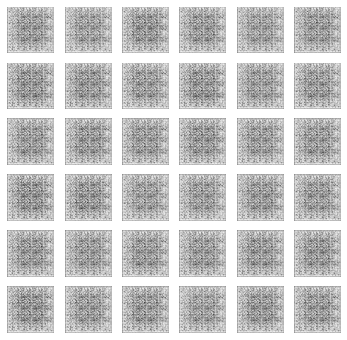

Epoch [0/10], Step [160/468], d_loss: 0.0132, g_loss: 8.5339, D(x): 0.99, D(G(z)): 0.00


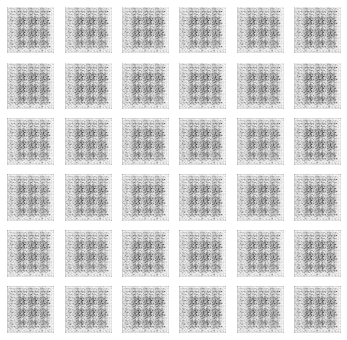

Epoch [0/10], Step [240/468], d_loss: 0.0030, g_loss: 7.6797, D(x): 1.00, D(G(z)): 0.00


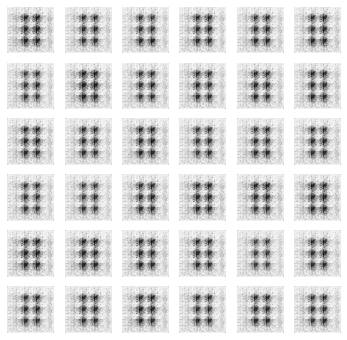

Epoch [0/10], Step [320/468], d_loss: 0.0048, g_loss: 8.5858, D(x): 1.00, D(G(z)): 0.00


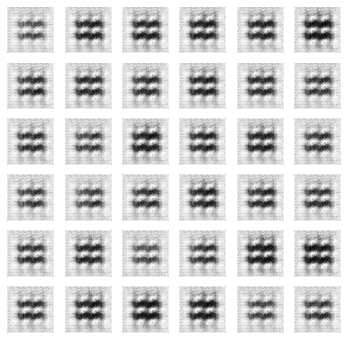

Epoch [0/10], Step [400/468], d_loss: 0.0048, g_loss: 8.5081, D(x): 1.00, D(G(z)): 0.00


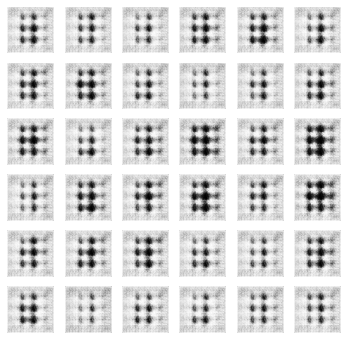

Epoch [1/10], Step [80/468], d_loss: 0.0088, g_loss: 6.9902, D(x): 1.00, D(G(z)): 0.01


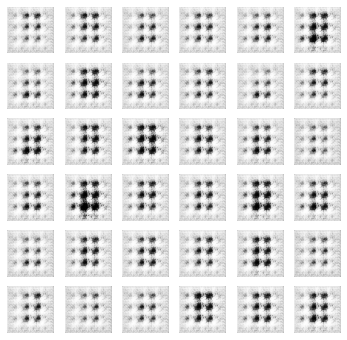

Epoch [1/10], Step [160/468], d_loss: 0.0110, g_loss: 7.3196, D(x): 0.99, D(G(z)): 0.00


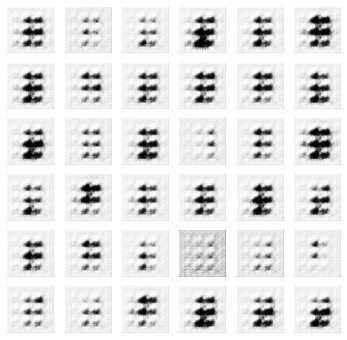

Epoch [1/10], Step [240/468], d_loss: 0.0054, g_loss: 7.2858, D(x): 1.00, D(G(z)): 0.00


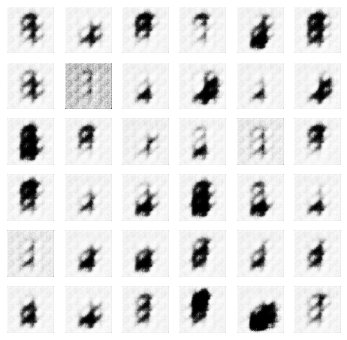

Epoch [1/10], Step [320/468], d_loss: 0.0051, g_loss: 7.2975, D(x): 1.00, D(G(z)): 0.00


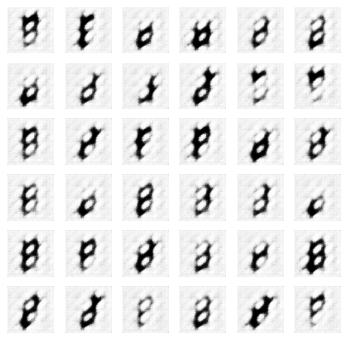

Epoch [1/10], Step [400/468], d_loss: 0.0053, g_loss: 7.4685, D(x): 1.00, D(G(z)): 0.00


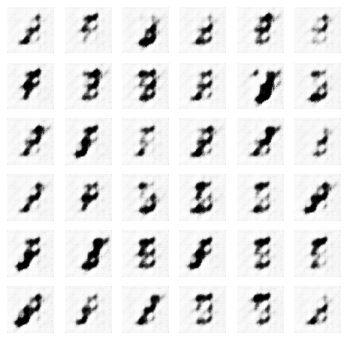

Epoch [2/10], Step [80/468], d_loss: 0.1090, g_loss: 10.7783, D(x): 1.00, D(G(z)): 0.10


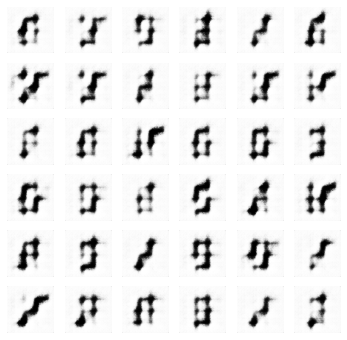

Epoch [2/10], Step [160/468], d_loss: 0.0022, g_loss: 6.6711, D(x): 1.00, D(G(z)): 0.00


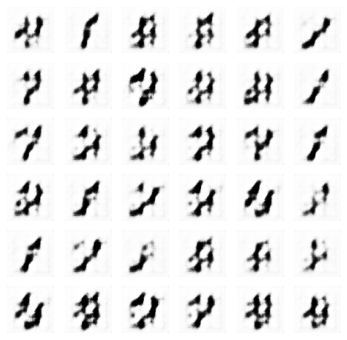

Epoch [2/10], Step [240/468], d_loss: 0.0013, g_loss: 7.9802, D(x): 1.00, D(G(z)): 0.00


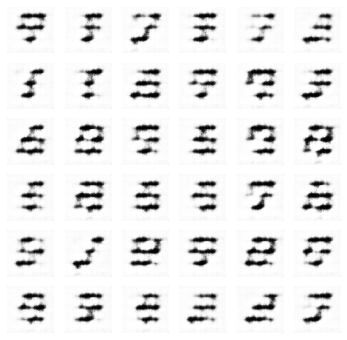

Epoch [2/10], Step [320/468], d_loss: 0.0072, g_loss: 7.8608, D(x): 0.99, D(G(z)): 0.00


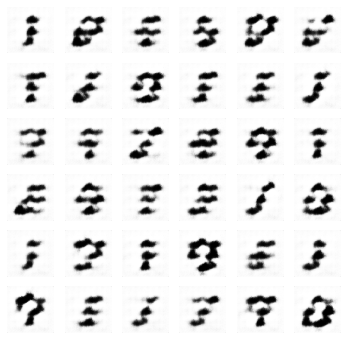

Epoch [2/10], Step [400/468], d_loss: 0.0433, g_loss: 10.8522, D(x): 0.97, D(G(z)): 0.01


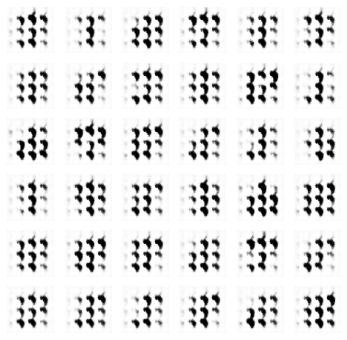

Epoch [3/10], Step [80/468], d_loss: 0.0155, g_loss: 7.9501, D(x): 1.00, D(G(z)): 0.01


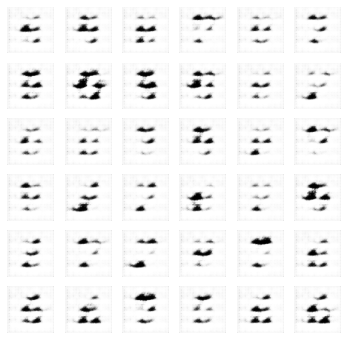

Epoch [3/10], Step [160/468], d_loss: 0.0030, g_loss: 8.1549, D(x): 1.00, D(G(z)): 0.00


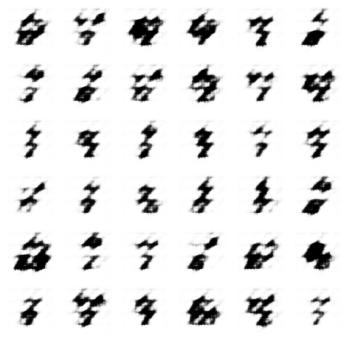

Epoch [3/10], Step [240/468], d_loss: 0.0130, g_loss: 6.8001, D(x): 0.99, D(G(z)): 0.00


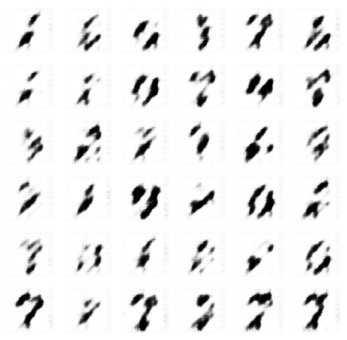

Epoch [3/10], Step [320/468], d_loss: 0.0089, g_loss: 7.1408, D(x): 1.00, D(G(z)): 0.00


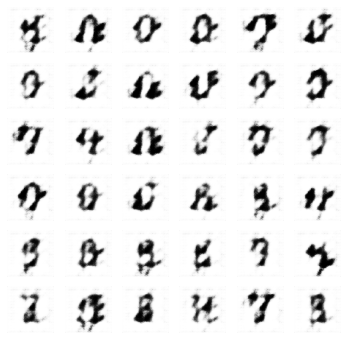

Epoch [3/10], Step [400/468], d_loss: 0.0528, g_loss: 6.1983, D(x): 0.98, D(G(z)): 0.03


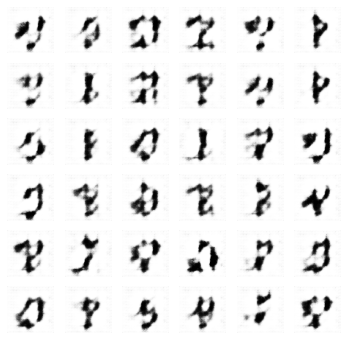

Epoch [4/10], Step [80/468], d_loss: 0.0090, g_loss: 9.2125, D(x): 1.00, D(G(z)): 0.01


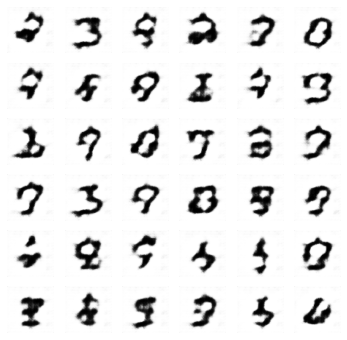

Epoch [4/10], Step [160/468], d_loss: 0.8429, g_loss: 5.6091, D(x): 0.88, D(G(z)): 0.21


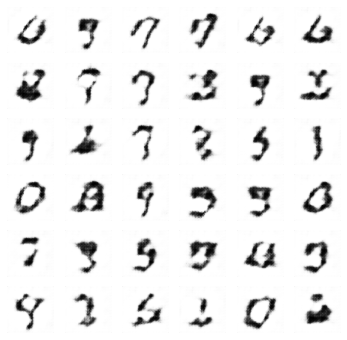

Epoch [4/10], Step [240/468], d_loss: 0.0523, g_loss: 8.2922, D(x): 0.98, D(G(z)): 0.01


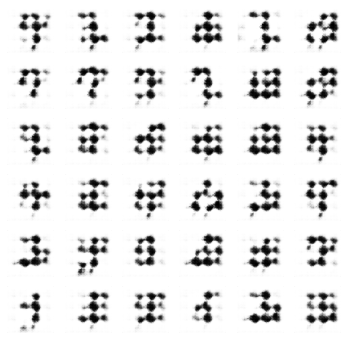

Epoch [4/10], Step [320/468], d_loss: 0.0710, g_loss: 7.1385, D(x): 0.97, D(G(z)): 0.01


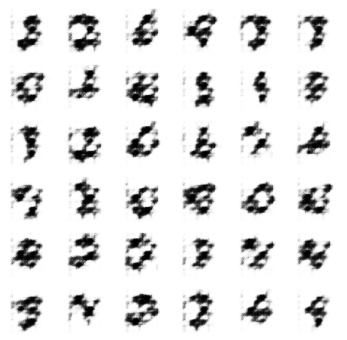

Epoch [4/10], Step [400/468], d_loss: 0.0287, g_loss: 6.9530, D(x): 0.98, D(G(z)): 0.01


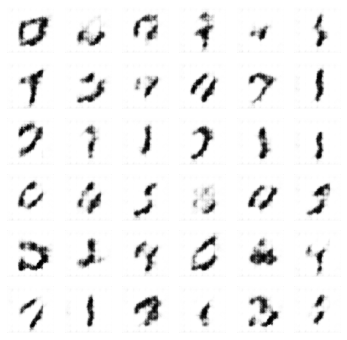

Epoch [5/10], Step [80/468], d_loss: 0.0543, g_loss: 4.2618, D(x): 1.00, D(G(z)): 0.05


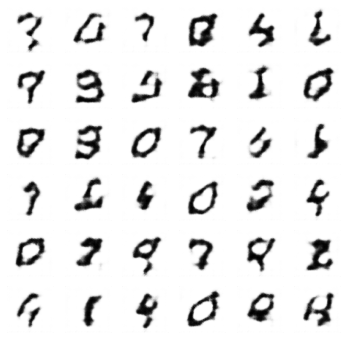

Epoch [5/10], Step [160/468], d_loss: 0.1828, g_loss: 5.2385, D(x): 1.00, D(G(z)): 0.12


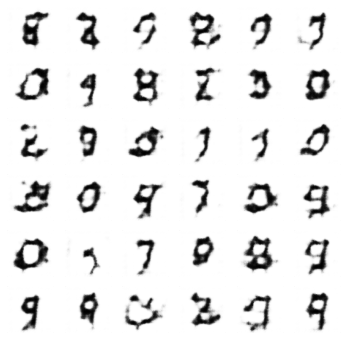

Epoch [5/10], Step [240/468], d_loss: 0.0360, g_loss: 6.1966, D(x): 0.98, D(G(z)): 0.01


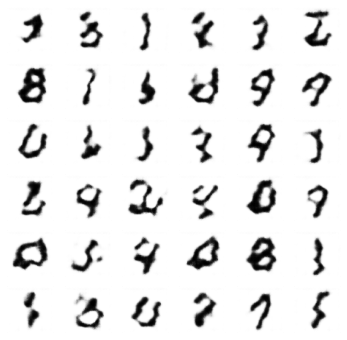

Epoch [5/10], Step [320/468], d_loss: 0.2741, g_loss: 3.9863, D(x): 0.99, D(G(z)): 0.17


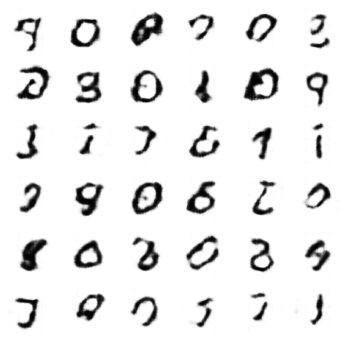

Epoch [5/10], Step [400/468], d_loss: 0.0421, g_loss: 7.4596, D(x): 0.97, D(G(z)): 0.00


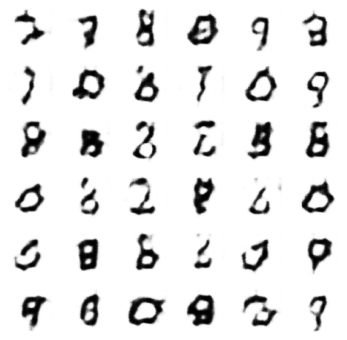

Epoch [6/10], Step [80/468], d_loss: 0.3382, g_loss: 4.6848, D(x): 0.97, D(G(z)): 0.16


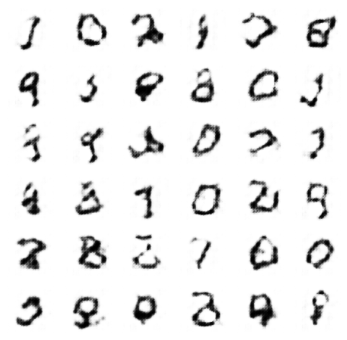

Epoch [6/10], Step [160/468], d_loss: 0.0400, g_loss: 5.6319, D(x): 1.00, D(G(z)): 0.03


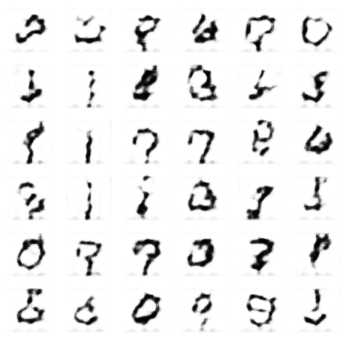

Epoch [6/10], Step [240/468], d_loss: 0.0453, g_loss: 6.6214, D(x): 0.97, D(G(z)): 0.02


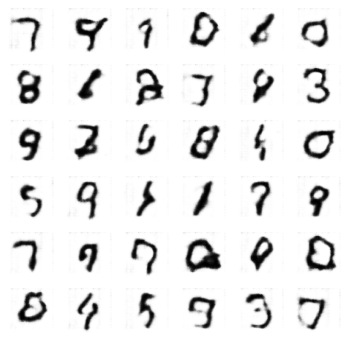

Epoch [6/10], Step [320/468], d_loss: 0.0705, g_loss: 5.9367, D(x): 0.95, D(G(z)): 0.02


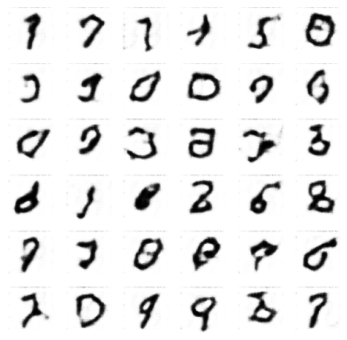

Epoch [6/10], Step [400/468], d_loss: 0.0482, g_loss: 4.8667, D(x): 0.98, D(G(z)): 0.03


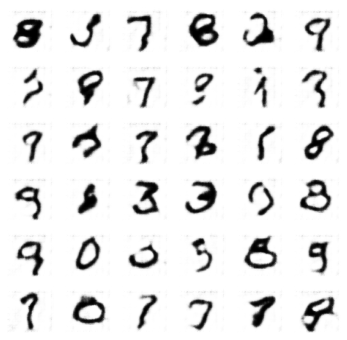

Epoch [7/10], Step [80/468], d_loss: 0.1885, g_loss: 5.3379, D(x): 0.87, D(G(z)): 0.00


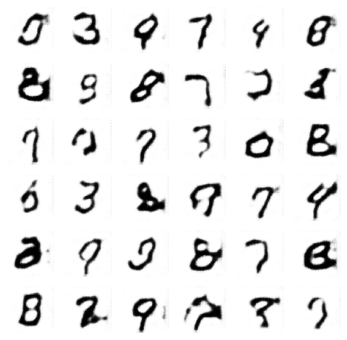

Epoch [7/10], Step [160/468], d_loss: 0.0992, g_loss: 4.7790, D(x): 0.99, D(G(z)): 0.08


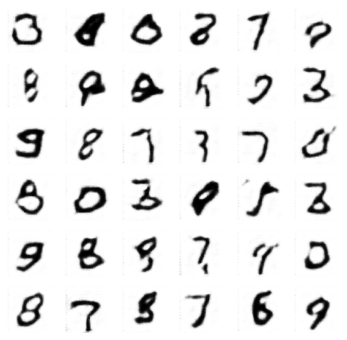

Epoch [7/10], Step [240/468], d_loss: 0.0629, g_loss: 5.3604, D(x): 0.96, D(G(z)): 0.01


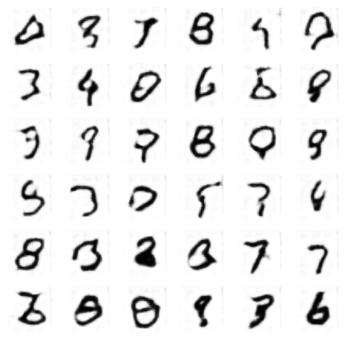

Epoch [7/10], Step [320/468], d_loss: 0.1811, g_loss: 3.4605, D(x): 0.94, D(G(z)): 0.07


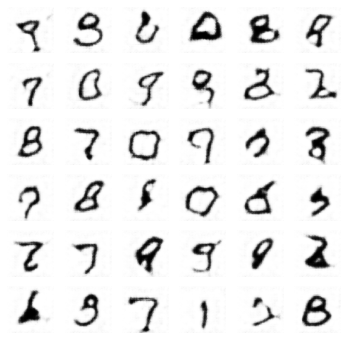

Epoch [7/10], Step [400/468], d_loss: 0.0993, g_loss: 6.1368, D(x): 0.98, D(G(z)): 0.06


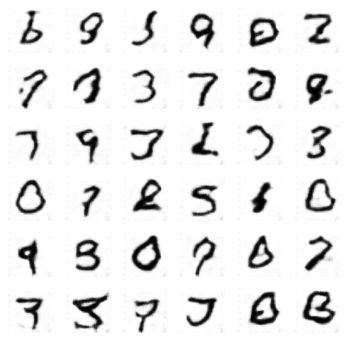

Epoch [8/10], Step [80/468], d_loss: 0.0781, g_loss: 5.0001, D(x): 0.97, D(G(z)): 0.04


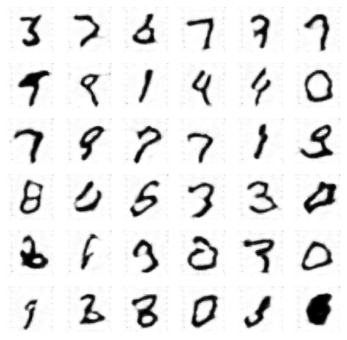

Epoch [8/10], Step [160/468], d_loss: 0.1016, g_loss: 4.7369, D(x): 0.94, D(G(z)): 0.03


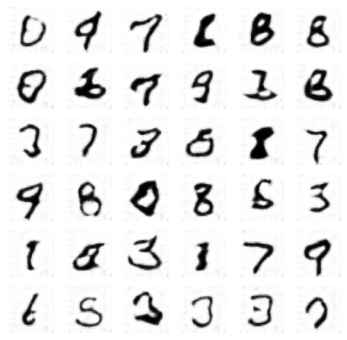

Epoch [8/10], Step [240/468], d_loss: 0.5245, g_loss: 4.4482, D(x): 0.69, D(G(z)): 0.00


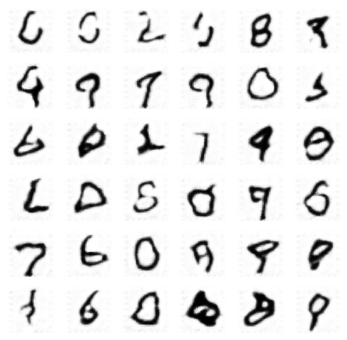

Epoch [8/10], Step [320/468], d_loss: 0.4477, g_loss: 6.0741, D(x): 1.00, D(G(z)): 0.29


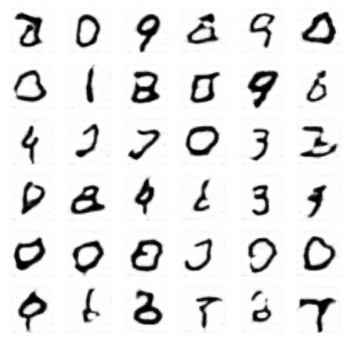

Epoch [8/10], Step [400/468], d_loss: 0.0750, g_loss: 5.2042, D(x): 0.95, D(G(z)): 0.02


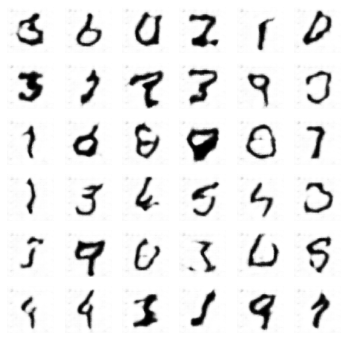

Epoch [9/10], Step [80/468], d_loss: 0.0568, g_loss: 4.6034, D(x): 0.99, D(G(z)): 0.04


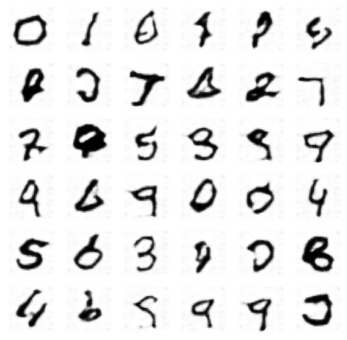

Epoch [9/10], Step [160/468], d_loss: 0.1231, g_loss: 6.6484, D(x): 0.91, D(G(z)): 0.01


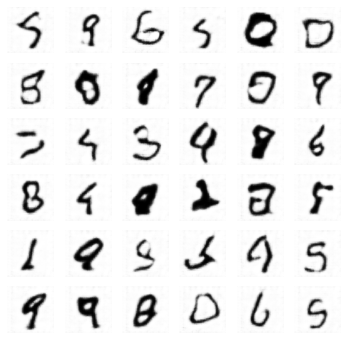

Epoch [9/10], Step [240/468], d_loss: 0.2245, g_loss: 5.4414, D(x): 1.00, D(G(z)): 0.13


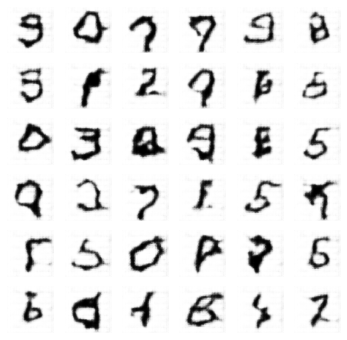

Epoch [9/10], Step [320/468], d_loss: 0.0731, g_loss: 5.5543, D(x): 0.94, D(G(z)): 0.00


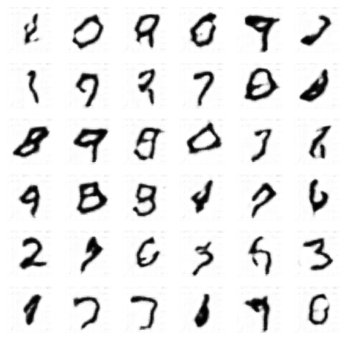

Epoch [9/10], Step [400/468], d_loss: 0.1214, g_loss: 5.5722, D(x): 0.91, D(G(z)): 0.01


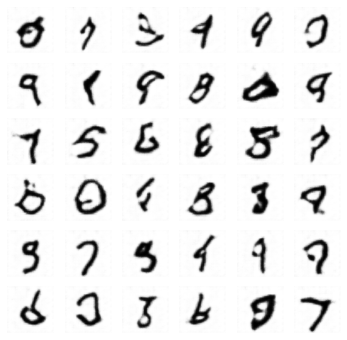

In [ ]:
import sys
import os
from torchvision import transforms
from torch.optim import Adam
from torchvision.datasets import MNIST
from array2gif import write_gif

LATENT_SIZE = 100
EPOCH_SIZE  = 10
ROW_NUM     = 6
try:
  data_path = os.path.join(os.path.abspath(os.environ["CONDA_PREFIX"]),
                          'datasets')
except KeyError:
    data_path = os.path.join(os.path.abspath(os.environ["HOME"]),
                         'datasets')
# We make sure that the numbers dataset is actually available
try:
    torchvision.datasets.MNIST(root=data_path,
                               download=False)
except RuntimeError or KeyError:
    if not os.path.isdir(data_path):
            os.makedirs(data_path)
    torchvision.datasets.MNIST(root=data_path,
                               download=True)

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm2d") != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0.0)


dataset = torchvision.datasets.MNIST(root=data_path,download=True)
dataset.transform = transforms.Compose([transforms.ToTensor(), 
                                        transforms.Normalize(mean = (0.5,), 
                                                             std = (0.5,)),
                                        transforms.Resize(64)])


# Data Loader
batch_size = 128
data_loader = torch.utils.data.DataLoader(dataset=dataset,
                                          batch_size=batch_size,
                                          shuffle=True, drop_last=True)
# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device is: " + str(device))

criterion = nn.BCELoss()

discriminator = Discriminator().to(device).apply(weights_init)
generator     = Generator().to(device).apply(weights_init)

optim_d = Adam(discriminator.parameters(), lr = 0.00005)
optim_g = Adam(generator.parameters(),     lr = 0.00005)

gif_array = []*EPOCH_SIZE
total_step = len(data_loader)
for epoch in range(EPOCH_SIZE):
    for step, (imgs, _) in enumerate(data_loader):

        # Create Fake and Real Labels
        real_labels = torch.ones(batch_size, 1,1,1).to(device)
        fake_labels = torch.zeros(batch_size, 1,1,1).to(device)

        # ================================================================== #
        #                      Train the discriminator                       #
        # ================================================================== #
        outputs     = discriminator(imgs)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        # BCE on fake images
        lat_space   = torch.randn(batch_size, LATENT_SIZE, 1, 1).to(device)
        fake_images = generator(lat_space)
        outputs     = discriminator(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score  = outputs

        # Backprop and optimize
        d_loss = d_loss_real + d_loss_fake
        optim_d.zero_grad()
        optim_g.zero_grad()
        d_loss.backward()
        optim_d.step()

        # ================================================================== #
        #                        Train the generator                         #
        # ================================================================== #

        # Compute loss with fake images
        lat_space = torch.randn(batch_size, LATENT_SIZE, 1, 1).to(device)
        fake_images = generator(lat_space)
        outputs = discriminator(fake_images)

        # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
        g_loss = criterion(outputs, real_labels)

        # Backpropagate and optimize
        optim_d.zero_grad()
        optim_g.zero_grad()
        g_loss.backward()
        optim_g.step()
        
        if (step+1) % 80 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                    .format(epoch, EPOCH_SIZE, 
                            step+1, total_step, 
                            d_loss.item(), 
                            g_loss.item(), 
                            real_score.mean().item(), 
                            fake_score.mean().item()))
            plot_epoch(fake_images.cpu())
            array_2_make_grid = ((fake_images.cpu()[0:ROW_NUM**2, :, :, :] + 1) * (1/2) * 255).type(torch.uint8)
            gif_array.append(torchvision.utils.make_grid(array_2_make_grid, nrow = ROW_NUM).numpy())
            write_gif(gif_array, filename = 'dcgan_10_fps.gif', fps = 10)

In [ ]:
write_gif(gif_array, filename = 'dcgan_5_fps.gif', fps = 5)